In [ ]:
pip install catboost


     |████████████████████████████████| 67.3MB 54kB/s 


##Import Relative Packages

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import sklearn 
#from snowflake.sqlalchemy import URL
#from sqlalchemy import create_engine
#import win32com.client as win32
import datetime as dt
import numpy as np
from datetime import datetime
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

import warnings
warnings.simplefilter('ignore')


#Read in Relevent Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart.csv")
print("Data Shape:",df.shape)
df.head(100)

Data Shape: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


##Data Set Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##Data Set Spread and Basic Statistics

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Univariate Analysis

In [ ]:
#Visualize the frequeny of categorical values
cat_features = [i for i in df.columns if df[i].max() <= 3]
for i in df[cat_features].columns:
        plt.figure(figsize = (10,2))
        sns.countplot(data = df, x=i)
        plt.title(i)

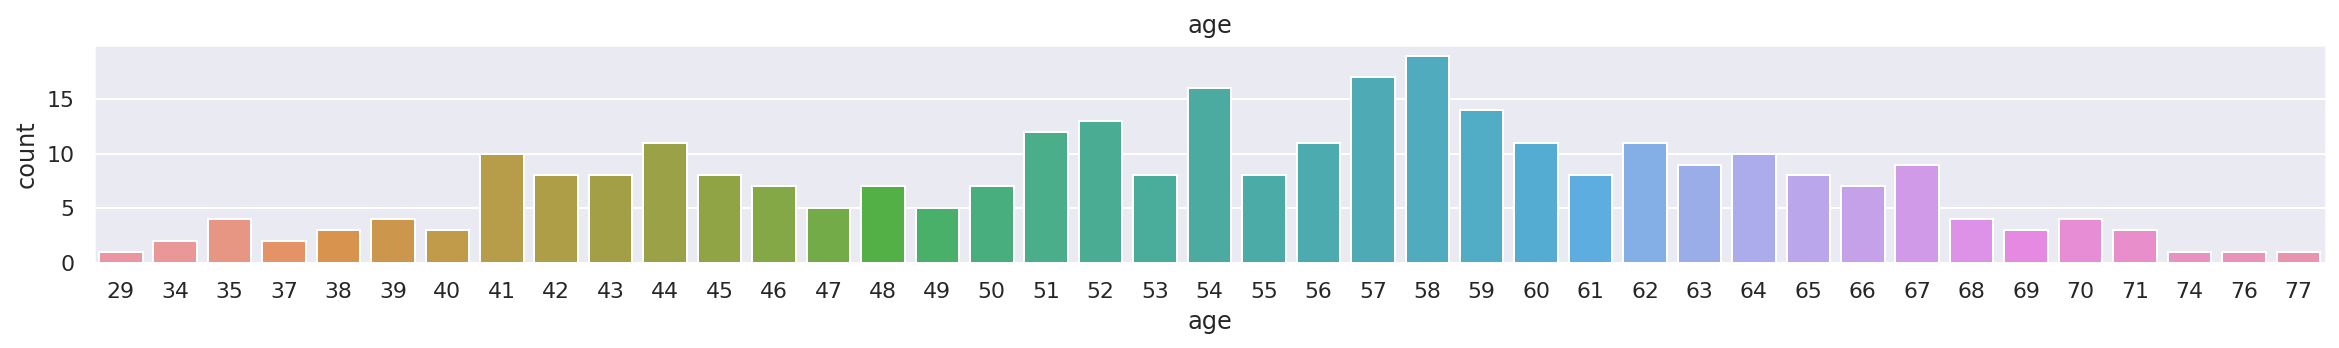

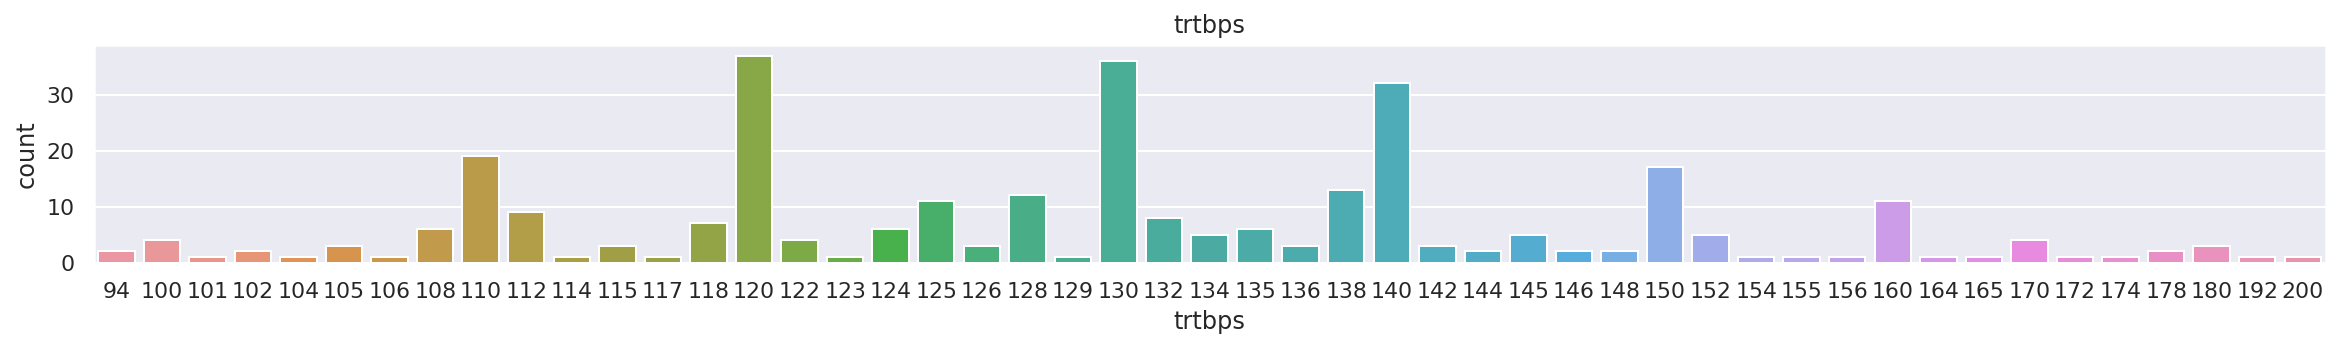

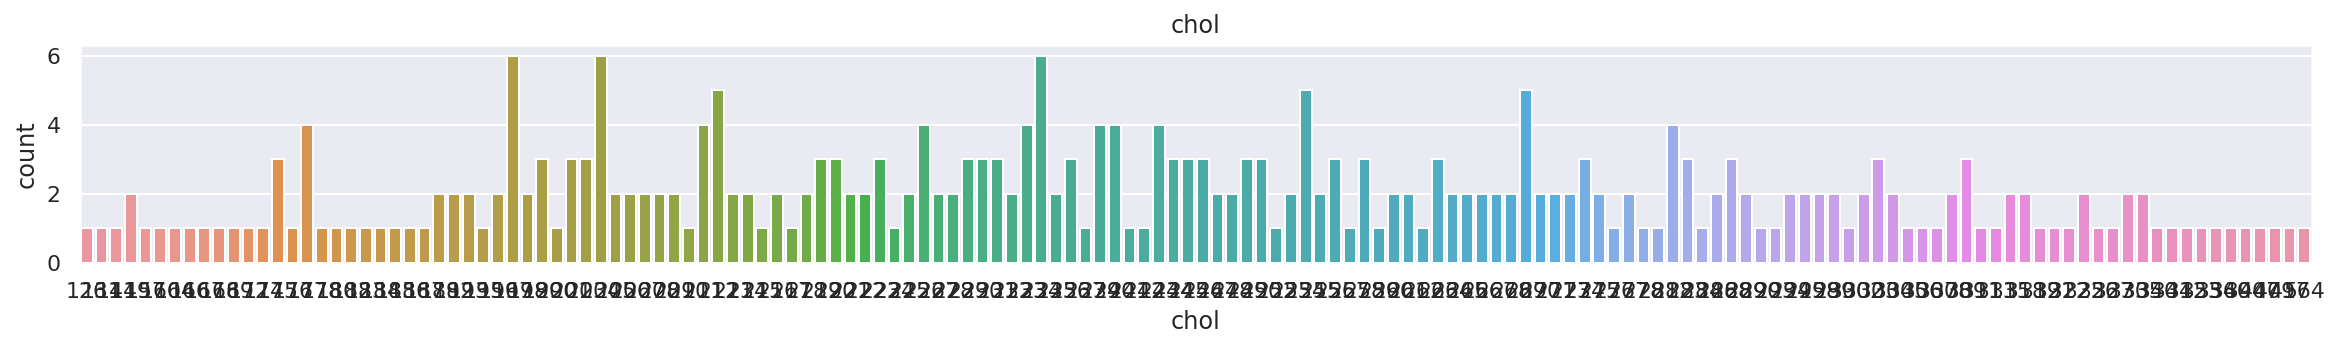

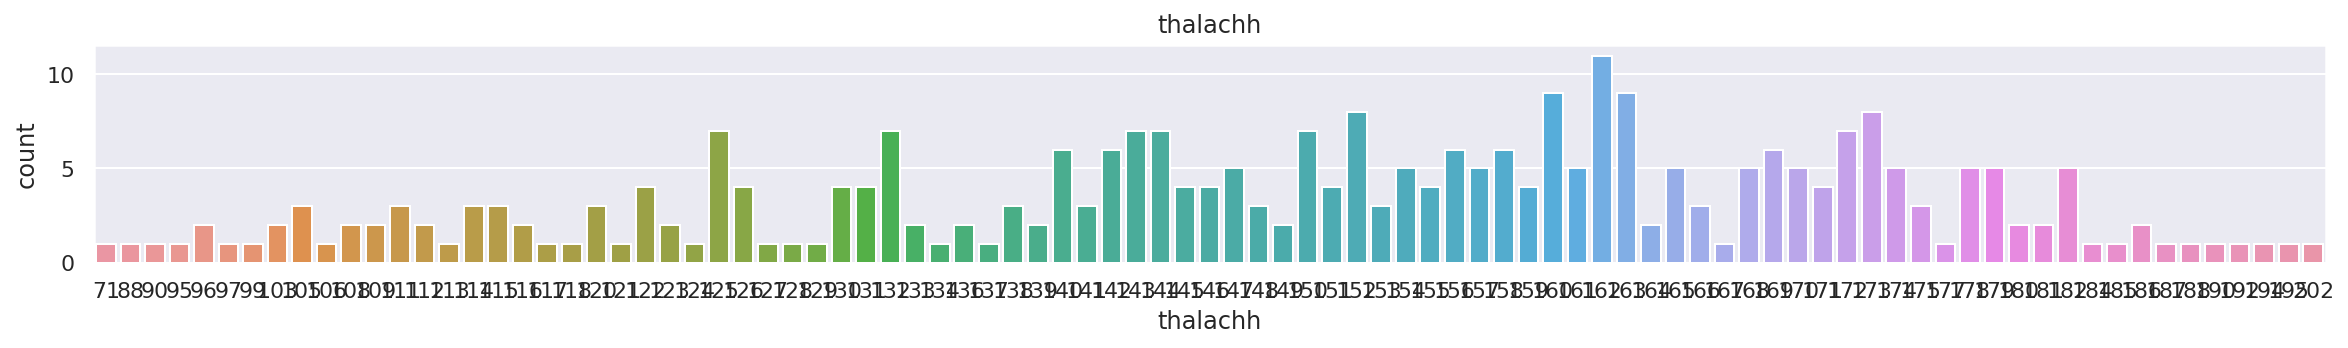

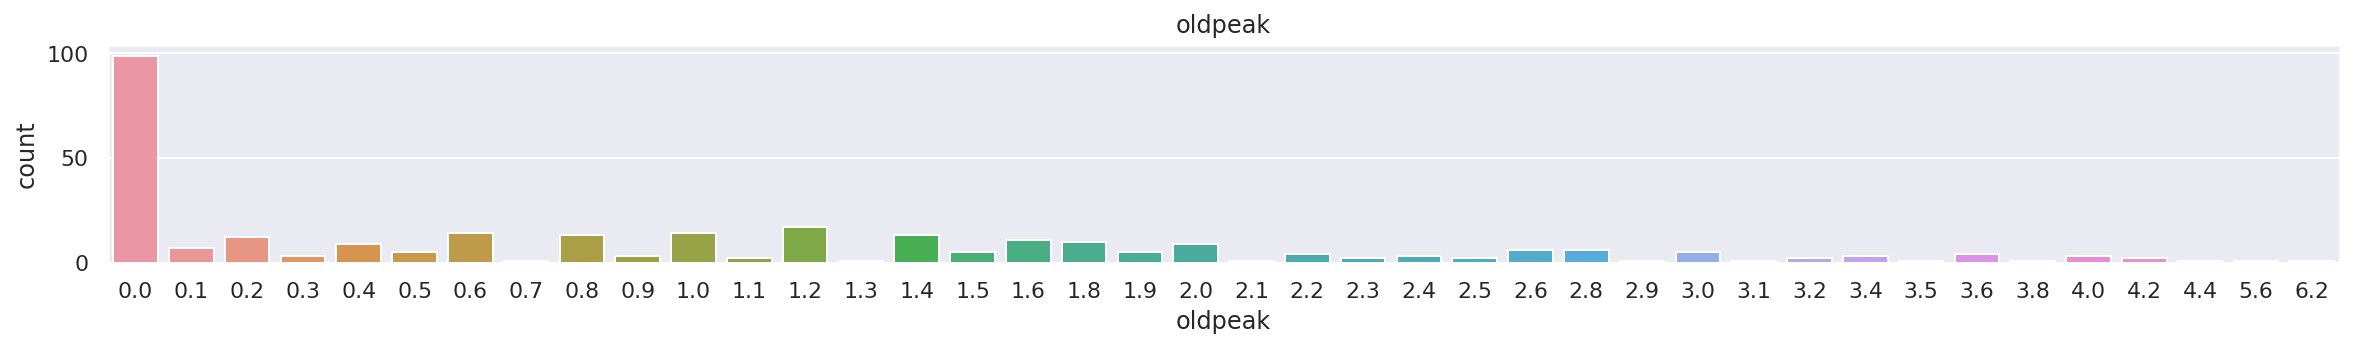

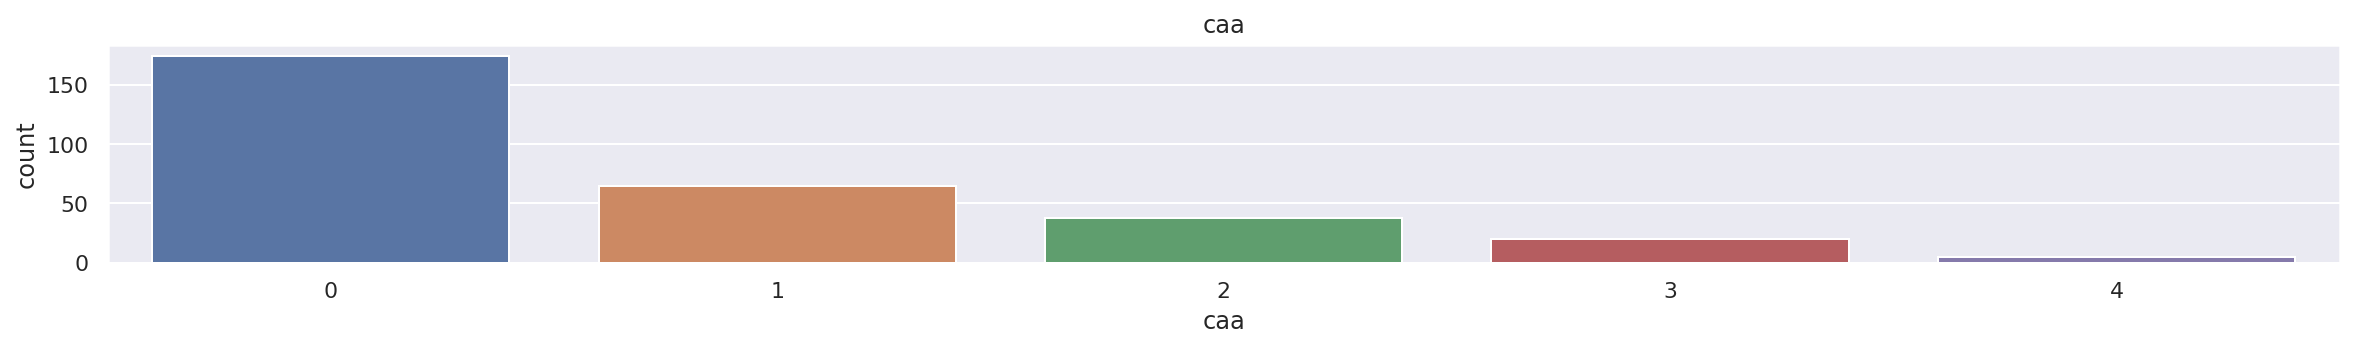

In [ ]:
#Visualize the frequeny of contiouse values
con_features = [i for i in df.columns if df[i].max() > 3]
for i in df[con_features].columns:
        plt.figure(figsize = (20
                              ,2))
        sns.countplot(data = df, x=i)
        plt.title(i)

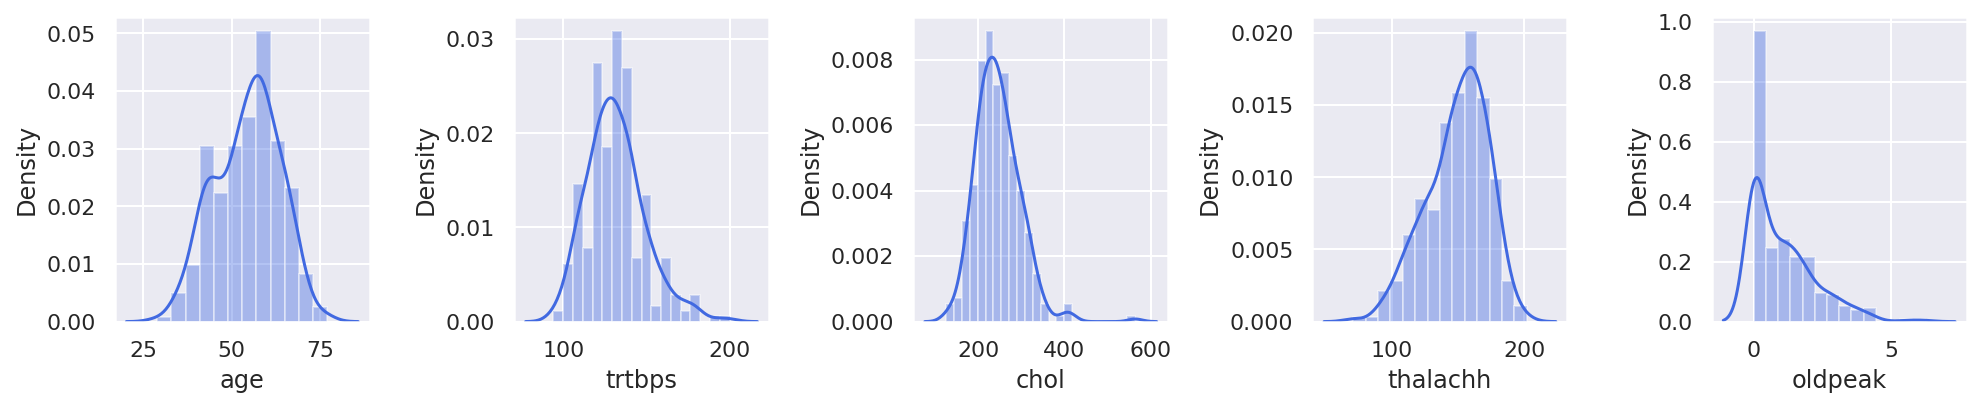

In [ ]:
#Visualize Density of Continous data points
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=False, figsize=(14,3))
sns.distplot(df['age'], color='royalblue', ax=ax[0])
sns.distplot(df['trtbps'], color='royalblue', ax=ax[1])
sns.distplot(df['chol'], color='royalblue', ax=ax[2])
sns.distplot(df['thalachh'], color='royalblue', ax=ax[3])
sns.distplot(df['oldpeak'], color='royalblue', ax=ax[4])
plt.tight_layout() 
plt.show()


<Figure size 1440x144 with 0 Axes>

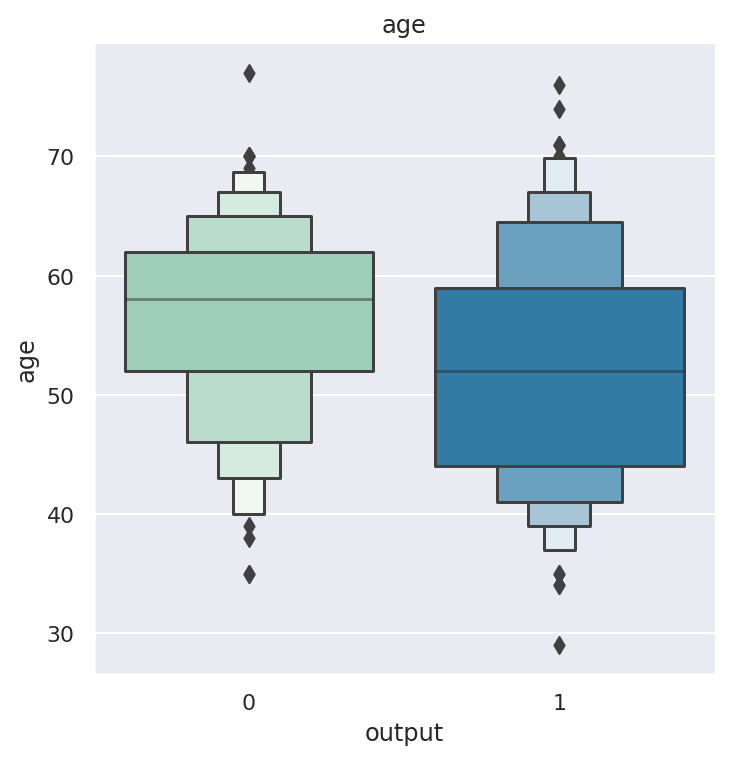

<Figure size 1440x144 with 0 Axes>

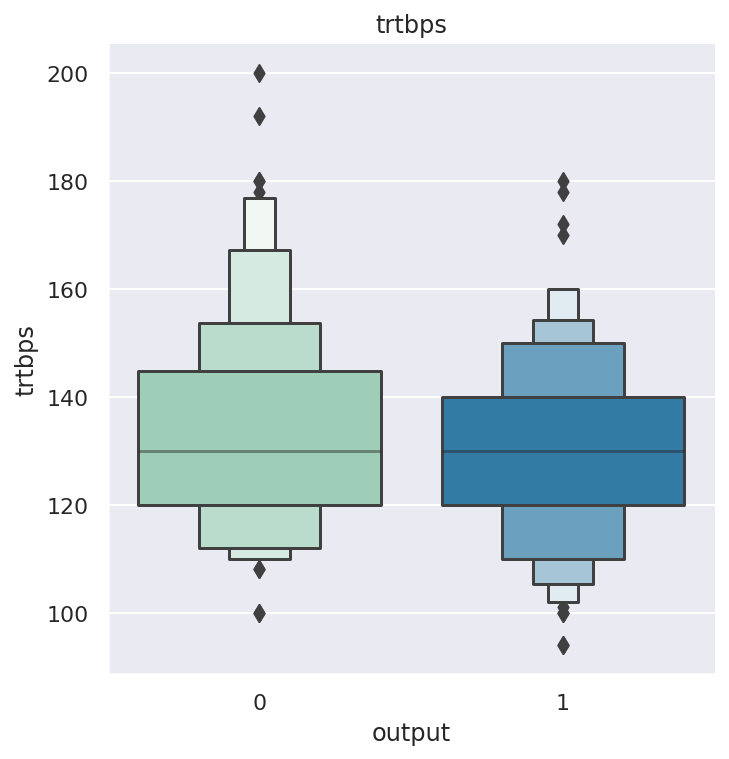

<Figure size 1440x144 with 0 Axes>

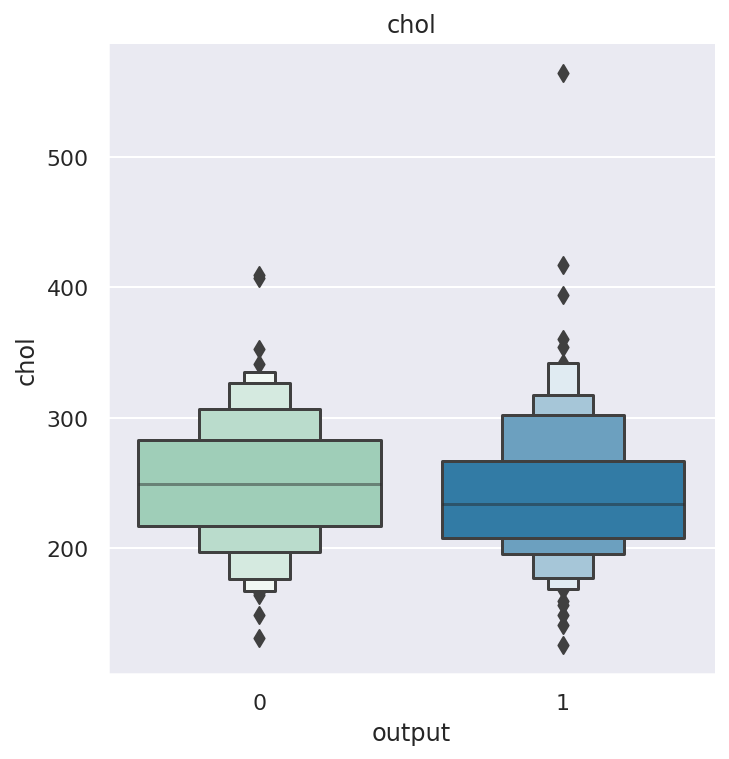

<Figure size 1440x144 with 0 Axes>

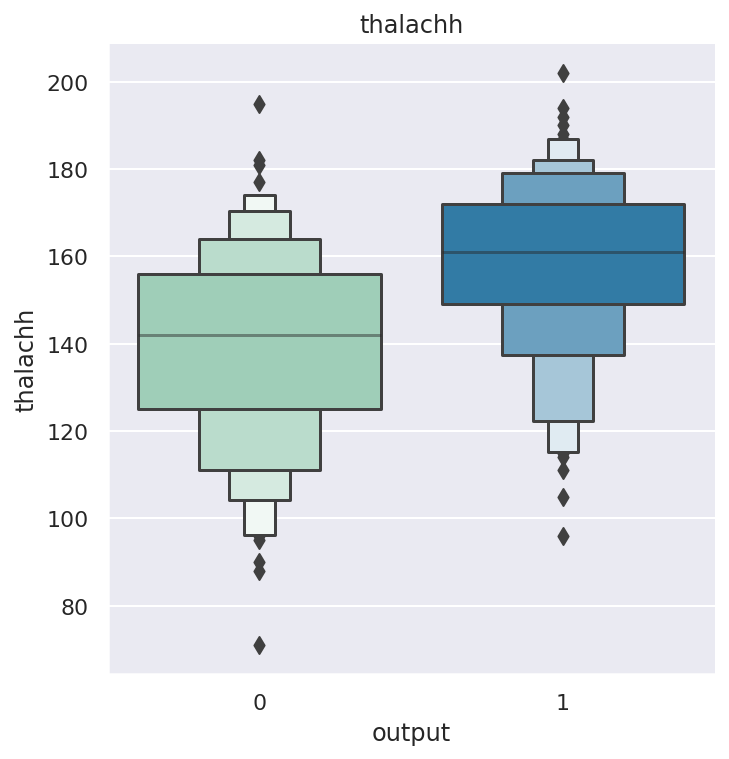

<Figure size 1440x144 with 0 Axes>

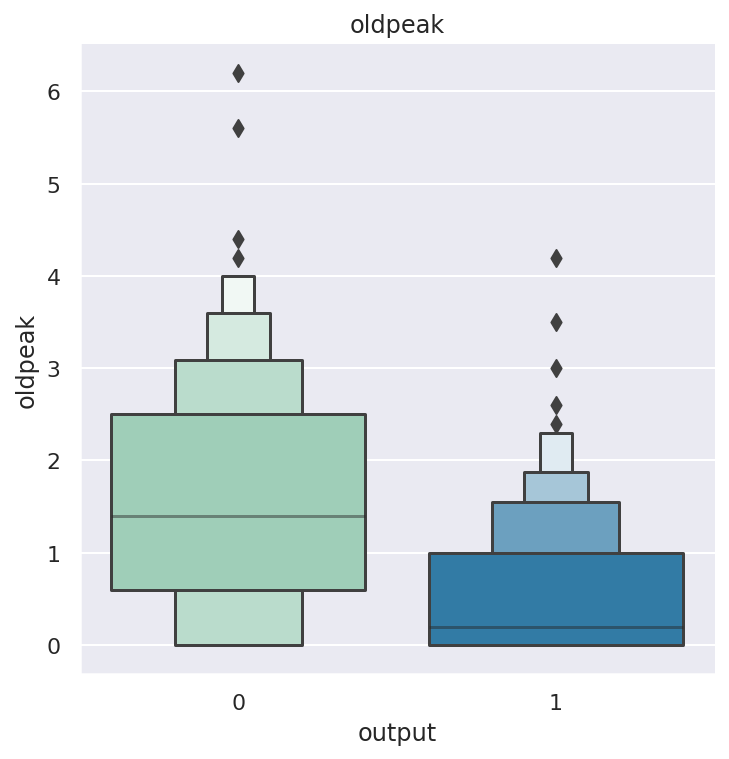

<Figure size 1440x144 with 0 Axes>

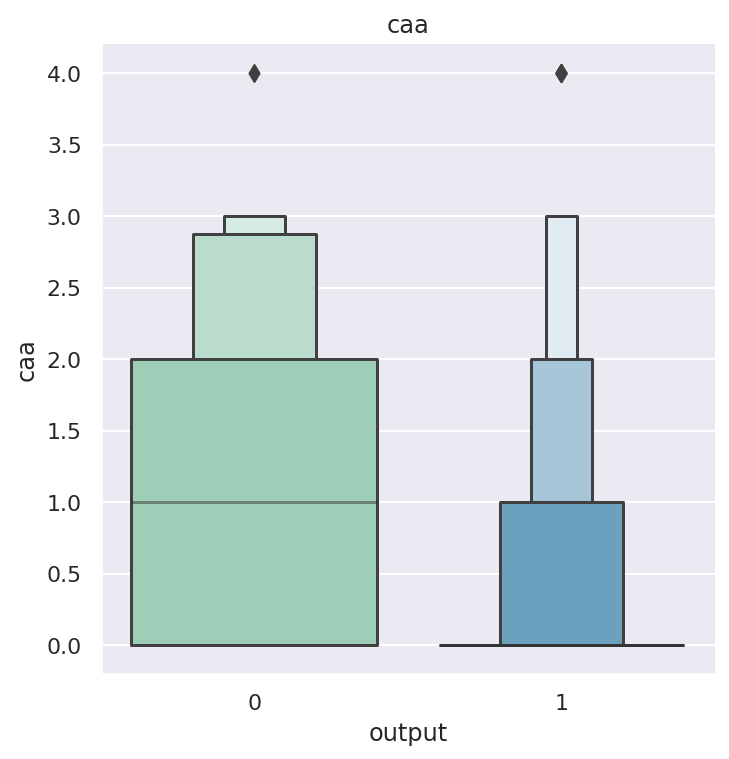

In [ ]:
#Visualize Boxplots of Continouse Variables againts Target (Ouput (Heartattack))
#sns.catplot(x="output", y="thalachh", kind="box", data=df)

con_features = [i for i in df.columns if df[i].max() > 3]
for i in df[con_features].columns:
  plt.figure(figsize = (20,2))
  sns.catplot(x="output", y=i, kind="boxen", data=df ,palette="YlGnBu")      
  plt.title(i)

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


            output
cp        0.433798
thalachh  0.421741
exng      0.436757
oldpeak   0.430696
output    1.000000


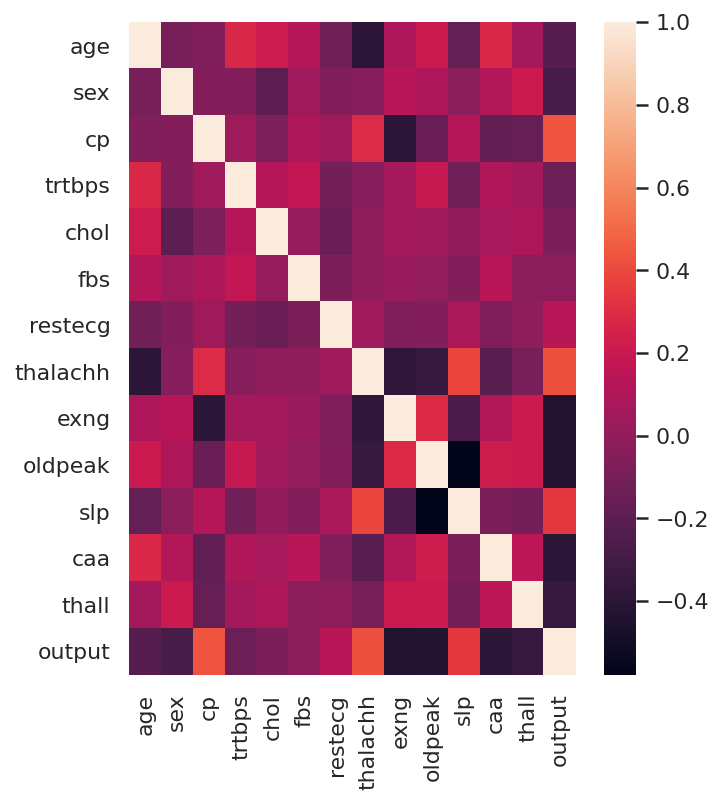

In [ ]:
fig, ax = plt.subplots(figsize=(5,6))
sns.heatmap(df.corr())
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["output"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
print(relevant_features.to_frame())

#Feature Selection
Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


In [ ]:
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import f_classif,chi2

X = df.iloc[:,0:12]
Y = df.iloc[:,13]
# feature extraction
test = SelectKBest(score_func=chi2, k=4).fit_transform(X, Y)

print(test[:5])
print(X.head())
#We will proceed to model with cp,thalachh,exng,oldpeak

[[  3.  150.    2.3   0. ]
 [  2.  187.    3.5   0. ]
 [  1.  172.    1.4   0. ]
 [  1.  178.    0.8   0. ]
 [  0.  163.    0.6   0. ]]
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa
0   63    1   3     145   233    1        0       150     0      2.3    0    0
1   37    1   2     130   250    0        1       187     0      3.5    0    0
2   41    0   1     130   204    0        0       172     0      1.4    2    0
3   56    1   1     120   236    0        1       178     0      0.8    2    0
4   57    0   0     120   354    0        1       163     1      0.6    2    0


#Model Pipeline(Test Models on Cross Validation Data Set)

In [ ]:
test_size = .2
seed = 10
X_train,X_test,Y_train,Y_test = train_test_split(test,Y,test_size=test_size, random_state=seed)
num_folds = 10

scoring = 'accuracy'
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=100)))
models.append(('RF', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LGBMClassifier', LGBMClassifier()))
models.append(('CatBoostClassifier', CatBoostClassifier()))
models.append(('MLPClassifier', MLPClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))


##################################################
# evaluate each model in turn
results = []
names = []
score = 'accuracy'
# store preds
from sklearn.model_selection import cross_val_predict
dwPreds = []
for name, model in models:
 kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
 # store the metrics
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = score)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)


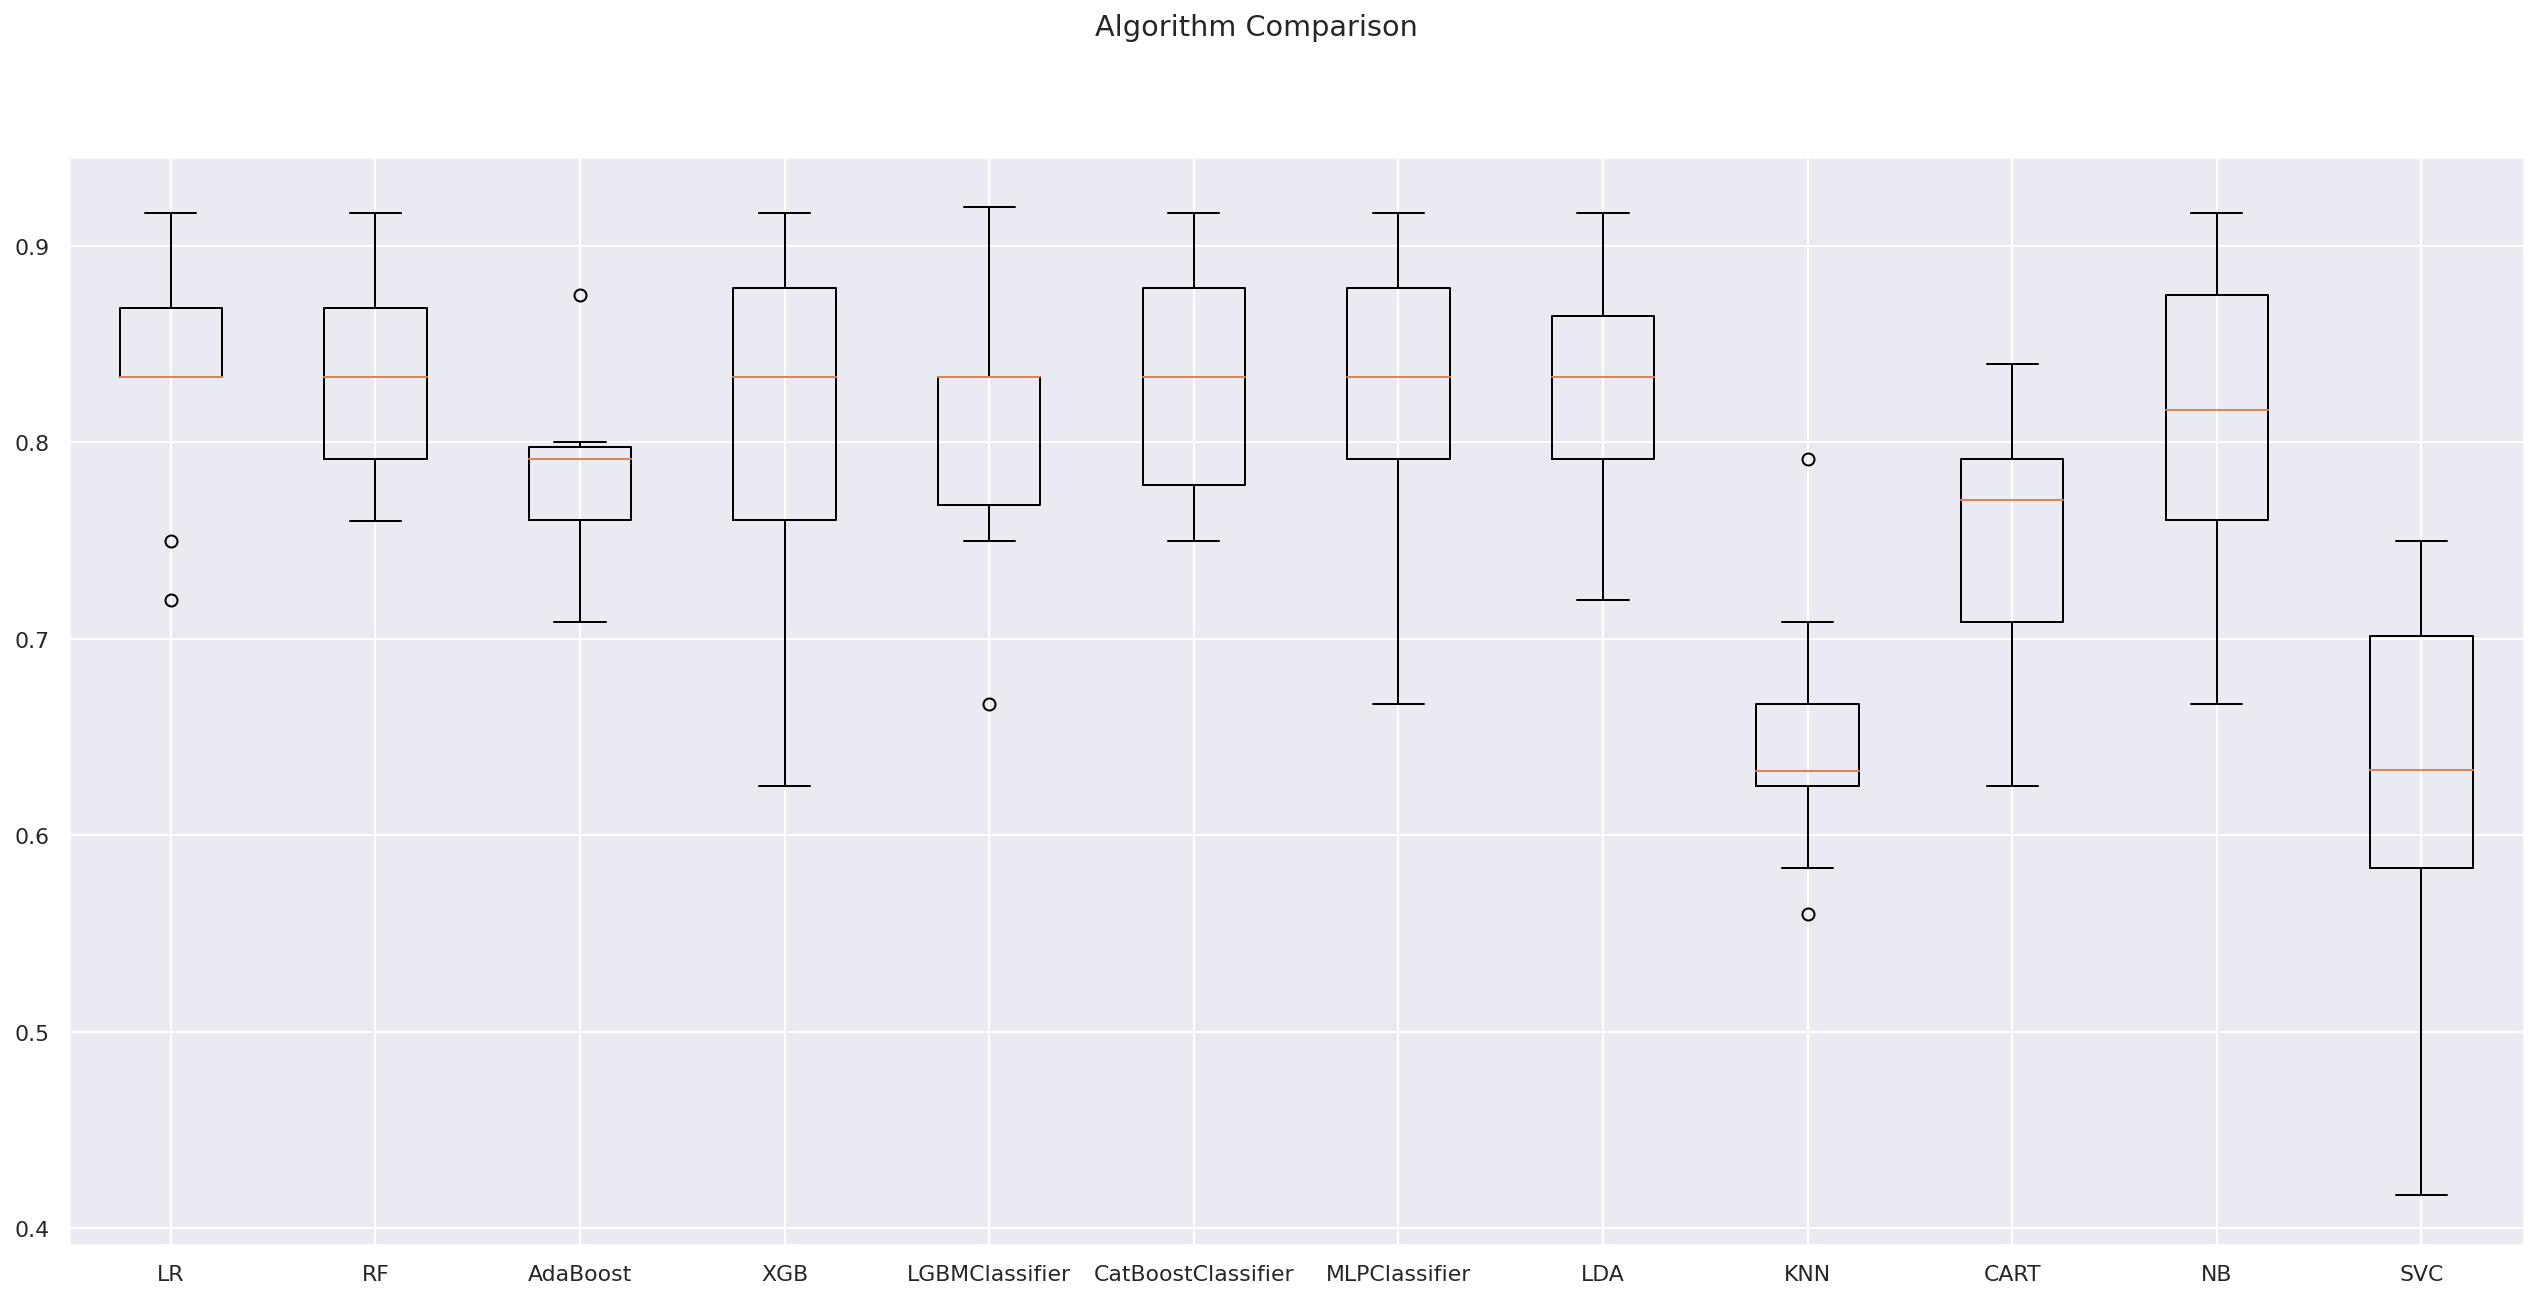

In [ ]:
 # Compare Algorithms
fig = plt.figure(figsize=(22,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##Use Decision Tree 

In [ ]:
from sklearn import tree

clf =  DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print(tn, fp, fn, tp)

0.8360655737704918
[[30  5]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.81      0.81      0.81        26

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

30 5 5 21


In [ ]:
plt.figure(figsize=(100,50))
tree.plot_tree(clf, filled=True, fontsize=14)

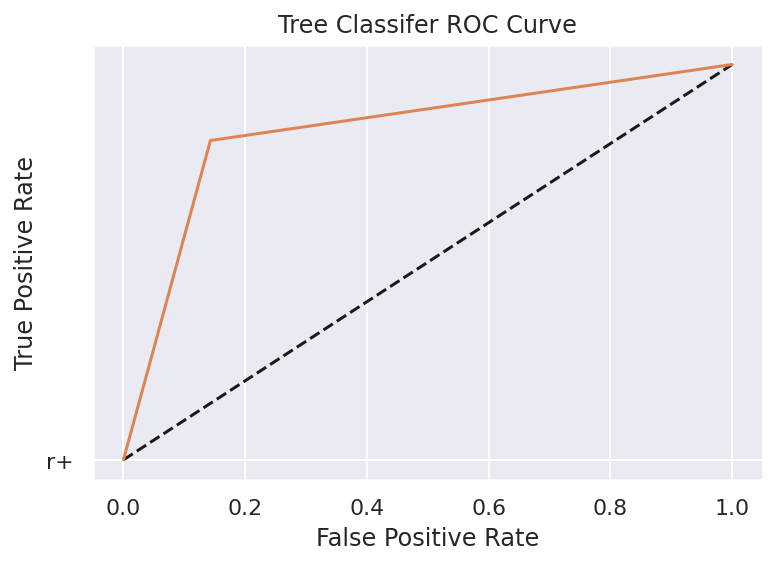

In [ ]:
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(Y_test,predictions)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Tree Classifer')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Tree Classifer ROC Curve")
plt.show()

##Hypertuning

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#now lets hypertune(:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[
                           ('dec_tree', dec_tree)])

n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
# define grid search
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, Y_train)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#Best model in terms of higher recall, aka detecting heart disease overall

In [ ]:
clf =  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print(tn, fp, fn, tp)

0.6557377049180327
[[16 19]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.89      0.46      0.60        35
           1       0.56      0.92      0.70        26

    accuracy                           0.66        61
   macro avg       0.72      0.69      0.65        61
weighted avg       0.75      0.66      0.64        61

16 19 2 24
